In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [8]:
path = '../Data/Flipkart/Images/'
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [9]:
data = pd.DataFrame()
data["image_path"] = list_photos
data

,image_path
0,aa68675f50a0551b8dadb954017a50a1.jpg
1,037c2402fee39fbc80433935711d1383.jpg
2,42643c1c9403f67921a18654bcf45ead.jpg
3,53f4bc7d7321f5c41de6b86e41f13e80.jpg
4,b144a363c107c7bdd91f32d6e28ba6f2.jpg
...,...
1045,4e5ebfc871992e7e22365c0c036a1b89.jpg
1046,82fbc93cd45ab747e7e606f2c52c7335.jpg
1047,216c6c3527984be3d7ad9023d5cd9bd1.jpg
1048,f54d0c5cbd8e2270742293edf9075cb1.jpg


In [10]:
import re
df = pd.read_csv("../Data/Flipkart/flipkart_com-ecommerce_sample_1050.csv")
df['product_category_tree'] = df['product_category_tree'].apply(lambda x: re.sub(r'>.*', '', x))
df['product_category_tree'] = df['product_category_tree'].str[2:]
df['product_category_tree'] = df['product_category_tree'].str[:-1]
df_image = []
df_image = pd.DataFrame(df_image)
df_image['image'] = df['image']
df_image['product_category_tree'] = df['product_category_tree']
print(df_image.shape)
print(data.shape)
data = pd.merge(data, df_image, left_on='image_path', right_on='image')
data = data.drop(columns=['image'])
data

(1050, 2)
(1050, 1)


,image_path,product_category_tree
0,aa68675f50a0551b8dadb954017a50a1.jpg,Kitchen & Dining
1,037c2402fee39fbc80433935711d1383.jpg,Home Furnishing
2,42643c1c9403f67921a18654bcf45ead.jpg,Baby Care
3,53f4bc7d7321f5c41de6b86e41f13e80.jpg,Home Decor & Festive Needs
4,b144a363c107c7bdd91f32d6e28ba6f2.jpg,Watches
...,...,...
1045,4e5ebfc871992e7e22365c0c036a1b89.jpg,Baby Care
1046,82fbc93cd45ab747e7e606f2c52c7335.jpg,Home Decor & Festive Needs
1047,216c6c3527984be3d7ad9023d5cd9bd1.jpg,Home Decor & Festive Needs
1048,f54d0c5cbd8e2270742293edf9075cb1.jpg,Home Furnishing


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['product_category_tree'])
data['label'] = le.transform(data['product_category_tree'])
data


,image_path,product_category_tree,label
0,aa68675f50a0551b8dadb954017a50a1.jpg,Kitchen & Dining,5
1,037c2402fee39fbc80433935711d1383.jpg,Home Furnishing,4
2,42643c1c9403f67921a18654bcf45ead.jpg,Baby Care,0
3,53f4bc7d7321f5c41de6b86e41f13e80.jpg,Home Decor & Festive Needs,3
4,b144a363c107c7bdd91f32d6e28ba6f2.jpg,Watches,6
...,...,...,...
1045,4e5ebfc871992e7e22365c0c036a1b89.jpg,Baby Care,0
1046,82fbc93cd45ab747e7e606f2c52c7335.jpg,Home Decor & Festive Needs,3
1047,216c6c3527984be3d7ad9023d5cd9bd1.jpg,Home Decor & Festive Needs,3
1048,f54d0c5cbd8e2270742293edf9075cb1.jpg,Home Furnishing,4


Home Furnishing
-------


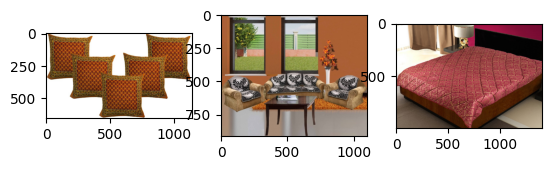

Baby Care
-------


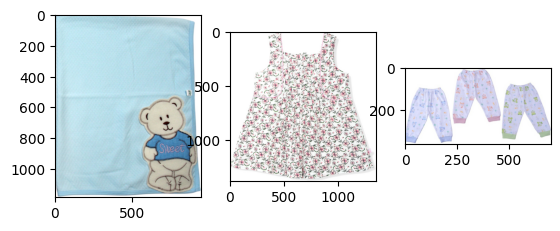

Watches
-------


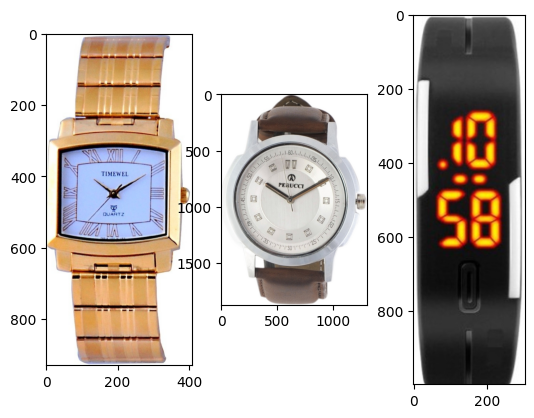

Home Decor & Festive Needs
-------


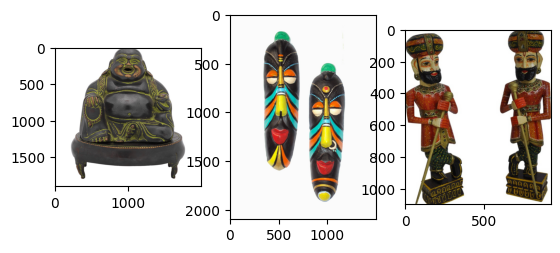

Kitchen & Dining
-------


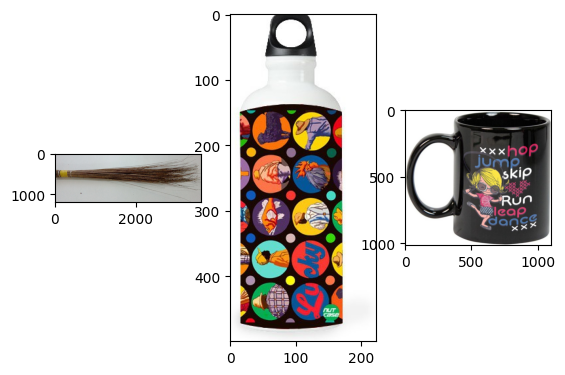

Beauty and Personal Care
-------


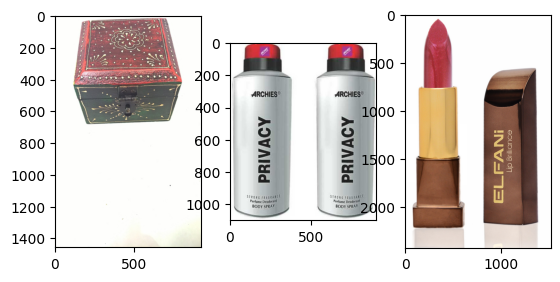

Computers
-------


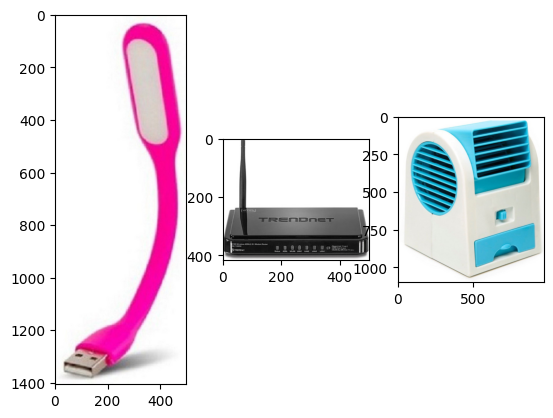

In [12]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data["image_path"][i] for i in range(len(data)) if data["product_category_tree"][i]==name]
    return list_image_name




list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
               'Home Decor & Festive Needs', 'Kitchen & Dining',
               'Beauty and Personal Care', 'Computers']

for name in list_labels :
    print(name)
    print("-------")
    
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(name)[i]
        image = imread(path + filename)
        plt.imshow(image)
    plt.show()

In [14]:
data.groupby('product_category_tree').count()

,image_path,label
product_category_tree,,
Baby Care,150,150
Beauty and Personal Care,150,150
Computers,150,150
Home Decor & Festive Needs,150,150
Home Furnishing,150,150
Kitchen & Dining,150,150
Watches,150,150


In [17]:
dataset = '../Data/3.normalized_dataset_image.csv'
data.to_csv(dataset, index=False)